In [3]:
import numpy as np
random_baselines = np.random.uniform(size=(100, 2), low=(1/400), high=1/10)

In [6]:
random_baselines.shape

(100, 2)

In [10]:
np.savetxt('random_baselines.csv', random_baselines, header= 'U, V', delimiter=',')

## Generate test images

In [11]:
im = np.zeros(shape=(500, 500))
im[237, 238] = 5.

In [10]:
import matplotlib.pyplot as plt

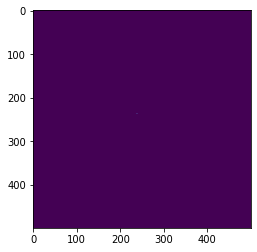

In [13]:
plt.imshow(im)

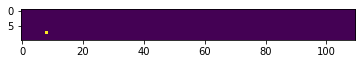

In [14]:
plt.imshow(im[230:240, 230:340])

In [17]:
from scipy import ndimage

In [18]:
im_conv = ndimage.gaussian_filter(im, sigma=8./2.355)

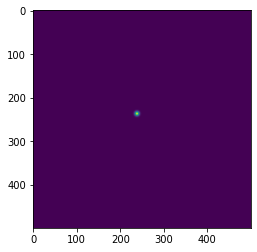

In [19]:
plt.imshow(im_conv)

In [1]:
np.save('../test-data/point.npy', im)

NameError: name 'np' is not defined

In [2]:
from jaxri import lnprob
import numpy as onp

In [3]:
import jax.numpy as jnp

In [4]:
uv_arr = jnp.asarray(onp.loadtxt('./random_baselines.csv', delimiter=','))

In [5]:
model_im = jnp.asarray(onp.load('../test-data/point.npy'))

In [6]:
lm_arr = jnp.indices(model_im.shape)

In [14]:
sims = lnprob.simulate(uv_arr, lm_arr, model_im, sigma=1)

In [15]:
sims.shape

(100,)

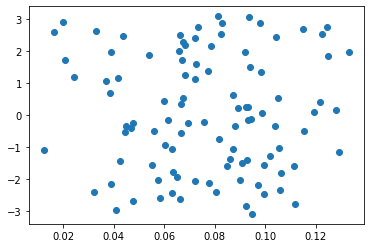

In [16]:
plt.scatter(onp.linalg.norm(uv_arr, axis=1), onp.angle(sims))

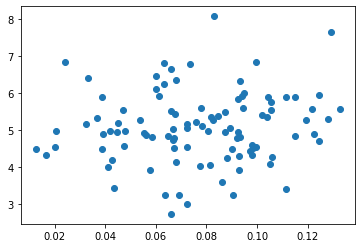

In [17]:
plt.scatter(onp.linalg.norm(uv_arr, axis=1), onp.abs(sims))

In [19]:
onp.savetxt('../test-data/point-random.csv', sims)